# Advanced Programming for Systems Biology and Visualisation

#### By 1836811
#### GitHub Repo: https://github.com/DLBPointon/APSB-coursework/

### Download and process an omics dataset

First, we must download a chosen dataset. This will be taken from the paper "Snord116-dependent diurnal rhythm of DNA methylation in mouse cortex" (Coulson et al. 2018), in which the authors look to investigate duirnally rythmic methylation of DNA. In order to simplify this, this project will focus on one replicate of the wild-type experiment. The methylation time course data are downloaded below:

In order to organise our data, we create a new directory.

In [ ]:
!mkdir data

The following 6 files are the first replicate of wild-type mice for each tested time. 

**BEWARE** In testing these files, they completed with a 450 error, which required the files to be re-downloaded.

In [ ]:
!curl https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2758nnn/GSM2758971/suppl/GSM2758971_JLRC004B.bed.gz -o ./data/ZT00_methylation_data.bed.gz

In [ ]:
!curl https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2977nnn/GSM2977644/suppl/GSM2977644_JLRC007A.bed.gz -o ./data/ZT03_methylation_data.bed.gz

In [ ]:
!curl https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2758nnn/GSM2758974/suppl/GSM2758974_JLRC001B.bed.gz -o ./data/ZT06_methylation_data.bed.gz

In [ ]:
!curl https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2977nnn/GSM2977647/suppl/GSM2977647_JLRC007C.bed.gz -o ./data/ZT09_methylation_data.bed.gz

In [ ]:
!curl https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2758nnn/GSM2758977/suppl/GSM2758977_JLRC004D.bed.gz -o ./data/ZT12_methylation_data.bed.gz

In [ ]:
!curl https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2758nnn/GSM2758980/suppl/GSM2758980_JLRC001D.bed.gz -o ./data/ZT16_methylation_data.bed.gz

In [ ]:
%%bash
cd data
for i in ./*gz;
    do gunzip $i
done


An example of the data can be seen here:

In [ ]:
%%bash
cd data
for i in ./*bed;
    do echo $i;
    head -n 5 $i
done

The data are in the format of:
1. chromosome
2. start of C
3. end of C (1 base away)
4. percent methylation and number of reads contributing to the permeth call (separate by a -)
5. 0 (placeholder for bed format)
6. strand (if CpG then it says + but is really a combination of both strands)
7. 0 (placeholder for bed format)
8. 0 (placeholder for bed format)
9. color (in RRR,GGG,BBB format)

As a form of analysis and to get a good look at the data as whole we can graph this. As the graph would be rather large using the full data set, we will focus on the Y chromosome and generate a graph showing percentage likelihood of methylation per time zone.

## Exploration

Import modules for further analysis.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

Basic analysis on the ZT03 bed file. This df will have 18 million rows of data, this would make it very difficult to reliably plot.

In [4]:
ZT03 = pd.read_csv('./data/ZT03_methylation_data.bed', sep='\t', header=None)

Add headers to the dataframe for easier navigation

In [5]:
header = ['chrom', 'chromStart', 'chromEnd', 'percentMeth-reads', 'placeholder1', 'strand', 'placeholder2', 'placeholder3', 'RGBcode']
ZT03.columns = header[:len(ZT03.columns)]

I only want data pertaining to methylated sites so we can perform some filtering on column 4, which requires being split from read count

In [6]:
ZT03[['percentMeth', 'MethReads']] = ZT03['percentMeth-reads'].str.split('-', 1, expand=True)

In [7]:
ZT03

,chrom,chromStart,chromEnd,percentMeth-reads,placeholder1,strand,placeholder2,placeholder3,RGBcode,percentMeth,MethReads
0,chr1,3000827,3000828,1.00-1,0,+,0,0,"210,27,27",1.00,1
1,chr1,3001007,3001008,1.00-3,0,+,0,0,"210,27,27",1.00,3
2,chr1,3001277,3001278,1.00-1,0,+,0,0,"210,27,27",1.00,1
3,chr1,3001629,3001630,1.00-2,0,+,0,0,"210,27,27",1.00,2
4,chr1,3003226,3003227,1.00-2,0,+,0,0,"210,27,27",1.00,2
...,...,...,...,...,...,...,...,...,...,...,...
18686511,chrY,90829214,90829215,0.00-1,0,+,0,0,"0,0,0",0.00,1
18686512,chrY,90829749,90829750,0.56-9,0,+,0,0,"27,74,210",0.56,9
18686513,chrY,90829772,90829773,1.00-11,0,+,0,0,"210,27,27",1.00,11
18686514,chrY,90829839,90829840,1.00-3,0,+,0,0,"210,27,27",1.00,3


Now that column 4 has been split, we can drop the columns we don't need.

In [8]:
ZT03.drop(['percentMeth-reads','placeholder1','placeholder2','placeholder3','RGBcode','strand'], axis=1)

,chrom,chromStart,chromEnd,percentMeth,MethReads
0,chr1,3000827,3000828,1.00,1
1,chr1,3001007,3001008,1.00,3
2,chr1,3001277,3001278,1.00,1
3,chr1,3001629,3001630,1.00,2
4,chr1,3003226,3003227,1.00,2
...,...,...,...,...,...
18686511,chrY,90829214,90829215,0.00,1
18686512,chrY,90829749,90829750,0.56,9
18686513,chrY,90829772,90829773,1.00,11
18686514,chrY,90829839,90829840,1.00,3


To double check that columns are correctly assigned a data type.

In [9]:
ZT03.dtypes

chrom                object
chromStart            int64
chromEnd              int64
percentMeth-reads    object
placeholder1          int64
strand               object
placeholder2          int64
placeholder3          int64
RGBcode              object
percentMeth          object
MethReads            object
dtype: object

To correct the new column dtypes.

In [10]:
pd.to_numeric(ZT03['percentMeth'])
pd.to_numeric(ZT03['MethReads'])

0            1
1            3
2            1
3            2
4            2
            ..
18686511     1
18686512     9
18686513    11
18686514     3
18686515     1
Name: MethReads, Length: 18686516, dtype: int64

We can view the methylation percentages of the Y chromosome with:

In [11]:
ZT03['ActualPercentMeth'] = ZT03['percentMeth'].astype(float)*100

Generate chromosome Y specific dataframe.

In [12]:
chromY_ZT03 = ZT03[ZT03['chrom'] == 'chrY']

Basic statistics to show that this dataframe does contain only chromosome Y data.

In [13]:
print(chromY_ZT03.count()) # New Dataframe
print('------------------')
print(chromY_ZT03['chrom'].value_counts()) # Values in Chromosome identifier column
print('------------------')
print(ZT03[ZT03['chrom'] == 'chrY'].count()) # Values corresponding to ChromY in the original DF

chrom                49423
chromStart           49423
chromEnd             49423
percentMeth-reads    49423
placeholder1         49423
strand               49423
placeholder2         49423
placeholder3         49423
RGBcode              49423
percentMeth          49423
MethReads            49423
ActualPercentMeth    49423
dtype: int64
------------------
chrY    49423
Name: chrom, dtype: int64
------------------
chrom                49423
chromStart           49423
chromEnd             49423
percentMeth-reads    49423
placeholder1         49423
strand               49423
placeholder2         49423
placeholder3         49423
RGBcode              49423
percentMeth          49423
MethReads            49423
ActualPercentMeth    49423
dtype: int64


It would be expected that the 'chromStart' column is from start to end of the chromosome in numerical order, to make sure we simply plot'chromStart' against itself. Any off diagonal marks would indicate unorderedness.

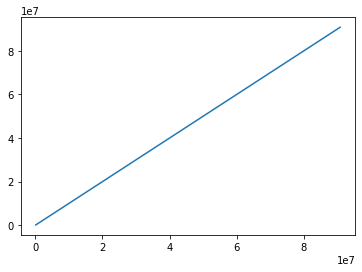

In [14]:
plt.plot(chromY_ZT03['chromStart'], chromY_ZT03['chromStart'])

The df only shows locations where there are probable methylated bases, to have a look at methylation across the chromosome we can perform the following:
- Initialise an empty DF.
- Generate a chromStart column for range(0, and max value of ChromY).
    - This does have the caveat of not being the complete size of the chromosome and so there may be a section of non-methylated sequence after the plot.
- This new column needs to be converted to float.

In [15]:
df2 = pd.DataFrame()

df2['chromStart'] = list(range(0, chromY_ZT03['chromStart'].max()))

df2['chromStart'] = df2['chromStart'].astype(float)

Create placeholder column for percentage of reads which are methylated.

In [16]:
df2['PercentMeth'] = None

Merge the chromosome "full representation" with the df containing mostly methylated sequence.

In [17]:
Ychrom = df2.merge(chromY_ZT03, on=['chromStart'], how='left')

Fill any NaN values with 0.

In [18]:
Ychrom['ActualPercentMeth'] = Ychrom['ActualPercentMeth'].fillna(0)

As the below function shows, 99.9% of the sequence has no methylation in ZT03:

In [19]:
zeros = 0
nonzeros = 0
for i in Ychrom['ActualPercentMeth']:
    if i == 0.0:
        zeros += 1
    elif i > 0.0:
        nonzeros += 1
        
total_bases = zeros + nonzeros

print(f'Count of Zeros: \t {zeros}')
print(f'Count of Non-Zeros: \t{nonzeros}')
print(f'Percentage of Zeros: \t{(zeros / total_bases) * 100}')
print(f'Percentage of Non-Zeros: {(nonzeros / total_bases) * 100}')

Count of Zeros: 	 90786904
Count of Non-Zeros: 	42995
Percentage of Zeros: 	99.95266426532082
Percentage of Non-Zeros: 0.04733573467917211


Now we can generate a line plot which shows the percentage likelihood of a nucleotide's read indicating methylation across chromosome Y length.

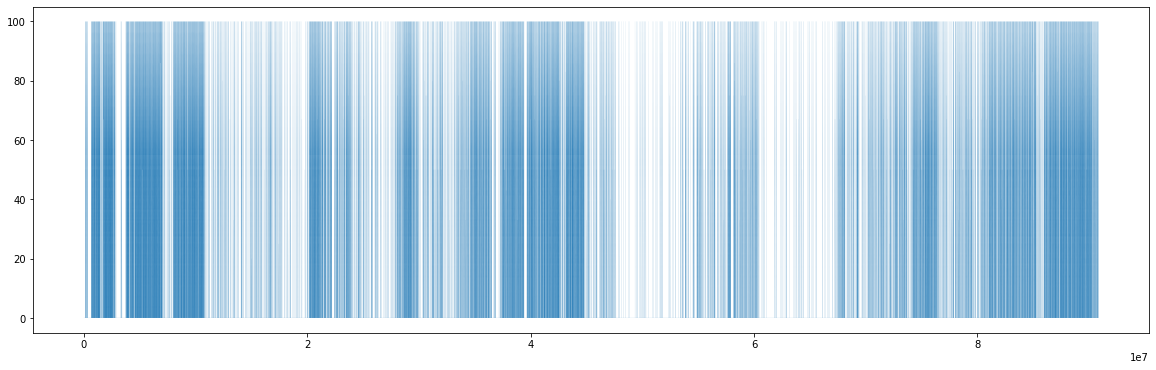

In [20]:
fig, ax = plt.subplots()
ax.plot(Ychrom['ActualPercentMeth'].astype(int), linewidth=0.05)

width = 20
height = 6
fig.set_size_inches(width, height)

## Utilise 2-dimensional arrays for processing data 
Using Pandas we can manipulate the multiple bed files and generate a singular data table representing the effect of time on the metylation across the entire genome.
This requires reading all data and generating a data frame which will focus on one chromosome and then plot a graph to show methylation of a chromosome over time.

In [21]:
ZT00 = pd.read_csv('./data/ZT00_methylation_data.bed', sep='\t', header=None)
ZT03 = pd.read_csv('./data/ZT03_methylation_data.bed', sep='\t', header=None)
ZT06 = pd.read_csv('./data/ZT06_methylation_data.bed', sep='\t', header=None)
ZT09 = pd.read_csv('./data/ZT09_methylation_data.bed', sep='\t', header=None)
ZT12 = pd.read_csv('./data/ZT12_methylation_data.bed', sep='\t', header=None)
ZT16 = pd.read_csv('./data/ZT16_methylation_data.bed', sep='\t', header=None)

In [22]:
header = ['chrom', 'chromStart', 'chromEnd', 'percentMeth-reads', 'placeholder1', 'strand', 'placeholder2', 'placeholder3', 'RGBcode']
ZT00.columns = header[:len(ZT00.columns)]
ZT03.columns = header[:len(ZT03.columns)]
ZT06.columns = header[:len(ZT06.columns)]
ZT09.columns = header[:len(ZT09.columns)]
ZT12.columns = header[:len(ZT12.columns)]
ZT16.columns = header[:len(ZT16.columns)]

Cut down to one chromosome, like above we will use Y.

In [23]:
chromY_ZT00 = ZT00[ZT00['chrom'] == 'chrY']
chromY_ZT03 = ZT03[ZT03['chrom'] == 'chrY']
chromY_ZT06 = ZT06[ZT06['chrom'] == 'chrY']
chromY_ZT09 = ZT09[ZT09['chrom'] == 'chrY']
chromY_ZT12 = ZT12[ZT12['chrom'] == 'chrY']
chromY_ZT16 = ZT16[ZT16['chrom'] == 'chrY']

In [24]:
chromY_ZT00

,chrom,chromStart,chromEnd,percentMeth-reads,placeholder1,strand,placeholder2,placeholder3,RGBcode
17536672,chrY,10003388,10003389,1.00-2,0,+,0,0,"210,27,27"
17536673,chrY,10004258,10004259,0.50-2,0,+,0,0,"27,74,210"
17536674,chrY,10004260,10004261,0.50-2,0,+,0,0,"27,74,210"
17536675,chrY,10004398,10004399,1.00-1,0,+,0,0,"210,27,27"
17536676,chrY,10004408,10004409,0.00-1,0,+,0,0,"0,0,0"
...,...,...,...,...,...,...,...,...,...
17576614,chrY,9995953,9995954,1.00-2,0,+,0,0,"210,27,27"
17576615,chrY,999660,999661,1.00-2,0,+,0,0,"210,27,27"
17576616,chrY,999671,999672,1.00-3,0,+,0,0,"210,27,27"
17576617,chrY,999735,999736,1.00-1,0,+,0,0,"210,27,27"


Like in the previous section we will now split 'percentMeth-reads' into 'percentMeth'and 'MethReads' to return data on percentage of reads which indicate methylation and number of reads.

In [25]:
chromY_ZT00[['percentMeth', 'MethReads']] = chromY_ZT00['percentMeth-reads'].str.split('-', 1, expand=True)
chromY_ZT03[['percentMeth', 'MethReads']] = chromY_ZT03['percentMeth-reads'].str.split('-', 1, expand=True)
chromY_ZT06[['percentMeth', 'MethReads']] = chromY_ZT06['percentMeth-reads'].str.split('-', 1, expand=True)
chromY_ZT09[['percentMeth', 'MethReads']] = chromY_ZT09['percentMeth-reads'].str.split('-', 1, expand=True)
chromY_ZT12[['percentMeth', 'MethReads']] = chromY_ZT12['percentMeth-reads'].str.split('-', 1, expand=True)
chromY_ZT16[['percentMeth', 'MethReads']] = chromY_ZT16['percentMeth-reads'].str.split('-', 1, expand=True)

/Users/dp24/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [26]:
chromY_ZT00.drop(['percentMeth-reads','placeholder1','placeholder2','placeholder3','RGBcode','strand','chromEnd','chrom','MethReads'], axis=1)
chromY_ZT03.drop(['percentMeth-reads','placeholder1','placeholder2','placeholder3','RGBcode','strand','chromEnd','chrom','MethReads'], axis=1)
chromY_ZT06.drop(['percentMeth-reads','placeholder1','placeholder2','placeholder3','RGBcode','strand','chromEnd','chrom','MethReads'], axis=1)
chromY_ZT09.drop(['percentMeth-reads','placeholder1','placeholder2','placeholder3','RGBcode','strand','chromEnd','chrom','MethReads'], axis=1)
chromY_ZT12.drop(['percentMeth-reads','placeholder1','placeholder2','placeholder3','RGBcode','strand','chromEnd','chrom','MethReads'], axis=1)
chromY_ZT16.drop(['percentMeth-reads','placeholder1','placeholder2','placeholder3','RGBcode','strand','chromEnd','chrom','MethReads'], axis=1)

,chromStart,percentMeth
18668806,10000018,1.00
18668807,10000040,1.00
18668808,10000813,0.50
18668809,10002557,1.00
18668810,10003388,1.00
...,...,...
18717772,9996891,1.00
18717773,999735,1.00
18717774,999763,0.50
18717775,9998876,0.50


Rename Headers to simplify the merging of dataframes.

In [27]:
chromY_ZT00.rename({'percentMeth':'ZT00'}, inplace=True, axis=1)
chromY_ZT03.rename({'percentMeth':'ZT03'}, inplace=True, axis=1)
chromY_ZT06.rename({'percentMeth':'ZT06'}, inplace=True, axis=1)
chromY_ZT09.rename({'percentMeth':'ZT09'}, inplace=True, axis=1)
chromY_ZT12.rename({'percentMeth':'ZT12'}, inplace=True, axis=1)
chromY_ZT16.rename({'percentMeth':'ZT16'}, inplace=True, axis=1)

/Users/dp24/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [28]:
chromY_ZT00.drop(['percentMeth-reads','placeholder1','placeholder2','placeholder3','RGBcode','strand','chromEnd','chrom','MethReads'], axis=1)
chromY_ZT03.drop(['percentMeth-reads','placeholder1','placeholder2','placeholder3','RGBcode','strand','chromEnd','chrom','MethReads'], axis=1)
chromY_ZT06.drop(['percentMeth-reads','placeholder1','placeholder2','placeholder3','RGBcode','strand','chromEnd','chrom','MethReads'], axis=1)
chromY_ZT09.drop(['percentMeth-reads','placeholder1','placeholder2','placeholder3','RGBcode','strand','chromEnd','chrom','MethReads'], axis=1)
chromY_ZT12.drop(['percentMeth-reads','placeholder1','placeholder2','placeholder3','RGBcode','strand','chromEnd','chrom','MethReads'], axis=1)
chromY_ZT16.drop(['percentMeth-reads','placeholder1','placeholder2','placeholder3','RGBcode','strand','chromEnd','chrom','MethReads'], axis=1)

,chromStart,ZT16
18668806,10000018,1.00
18668807,10000040,1.00
18668808,10000813,0.50
18668809,10002557,1.00
18668810,10003388,1.00
...,...,...
18717772,9996891,1.00
18717773,999735,1.00
18717774,999763,0.50
18717775,9998876,0.50


As ZT00 is the largest dataframe, we will base the "full representation" on that data.

In [29]:
allData = pd.DataFrame()
allData['chromStart'] = list(range(0, chromY_ZT00['chromStart'].max()))

Now we can merge the data into one dataframe.

In [30]:
allData = pd.merge(allData, chromY_ZT00[['chromStart', 'ZT00']].astype(float), how='left', on="chromStart")
allData = pd.merge(allData, chromY_ZT03[['chromStart', 'ZT03']].astype(float), how='left', on="chromStart")
allData = pd.merge(allData, chromY_ZT06[['chromStart', 'ZT06']].astype(float), how='left', on="chromStart")
allData = pd.merge(allData, chromY_ZT09[['chromStart', 'ZT09']].astype(float), how='left', on="chromStart")
allData = pd.merge(allData, chromY_ZT12[['chromStart', 'ZT12']].astype(float), how='left', on="chromStart")
allData = pd.merge(allData, chromY_ZT16[['chromStart', 'ZT16']].astype(float), how='left', on="chromStart")

In [31]:
allData

,chromStart,ZT00,ZT03,ZT06,ZT09,ZT12,ZT16
0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
90830899,90830899,NaN,NaN,NaN,NaN,NaN,NaN
90830900,90830900,NaN,NaN,NaN,NaN,NaN,NaN
90830901,90830901,NaN,NaN,NaN,NaN,NaN,NaN
90830902,90830902,NaN,NaN,NaN,NaN,NaN,NaN


To observe some basic statistics on the data we can use pandas.count() (ran prior to .fillna() to count raw data) to return the number of cells per column and then pandas.describe() to return basic statistics on the data. In this second case, we will only need to take note of the first row which shows the valid data (nucleotide bases in which methylation may be indicated) brought in from the original data.

In [32]:
allData.count()

chromStart    90830904
ZT00             39946
ZT03             49423
ZT06             47901
ZT09             45293
ZT12             37109
ZT16             48971
dtype: int64

In [33]:
allData.describe()

,chromStart,ZT00,ZT03,ZT06,ZT09,ZT12,ZT16
count,9.083090e+07,39946.000000,49423.000000,47901.000000,45293.000000,37109.000000,48971.000000
mean,4.541545e+07,0.781523,0.781715,0.767885,0.781540,0.796533,0.758298
std,2.622062e+07,0.364182,0.352326,0.369485,0.359238,0.356887,0.369817
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.270773e+07,0.670000,0.670000,0.500000,0.670000,0.670000,0.500000
50%,4.541545e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,6.812318e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.083090e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now to clear the NaN data from the dataset and replace it with 0.0, a float to mimic the other data.

In [34]:
allData['ZT00'] = allData['ZT00'].fillna(0.0)
allData['ZT03'] = allData['ZT03'].fillna(0.0)
allData['ZT06'] = allData['ZT06'].fillna(0.0)
allData['ZT09'] = allData['ZT09'].fillna(0.0)
allData['ZT12'] = allData['ZT12'].fillna(0.0)
allData['ZT16'] = allData['ZT16'].fillna(0.0)

# Produce TSV file for analysis

Now that much of the transformational work has been performed on the data, it will be exported as a TSV to allow for external verification.

In [35]:
allData.to_csv('time_series_murine_methylation.tsv', sep="\t")

Now to read that data back into the IPYNB for analysis.

In [36]:
allData = pd.read_csv('time_series_murine_methylation.tsv', sep='\t')

In [37]:
allData = allData.drop(['Unnamed: 0'], axis=1)

We can now plot chromosome length graphs using this data with the following matplotlib function to create horizontal subplots per time set.

Note that in this plot, linewidth is effectively the resolution of the plot.

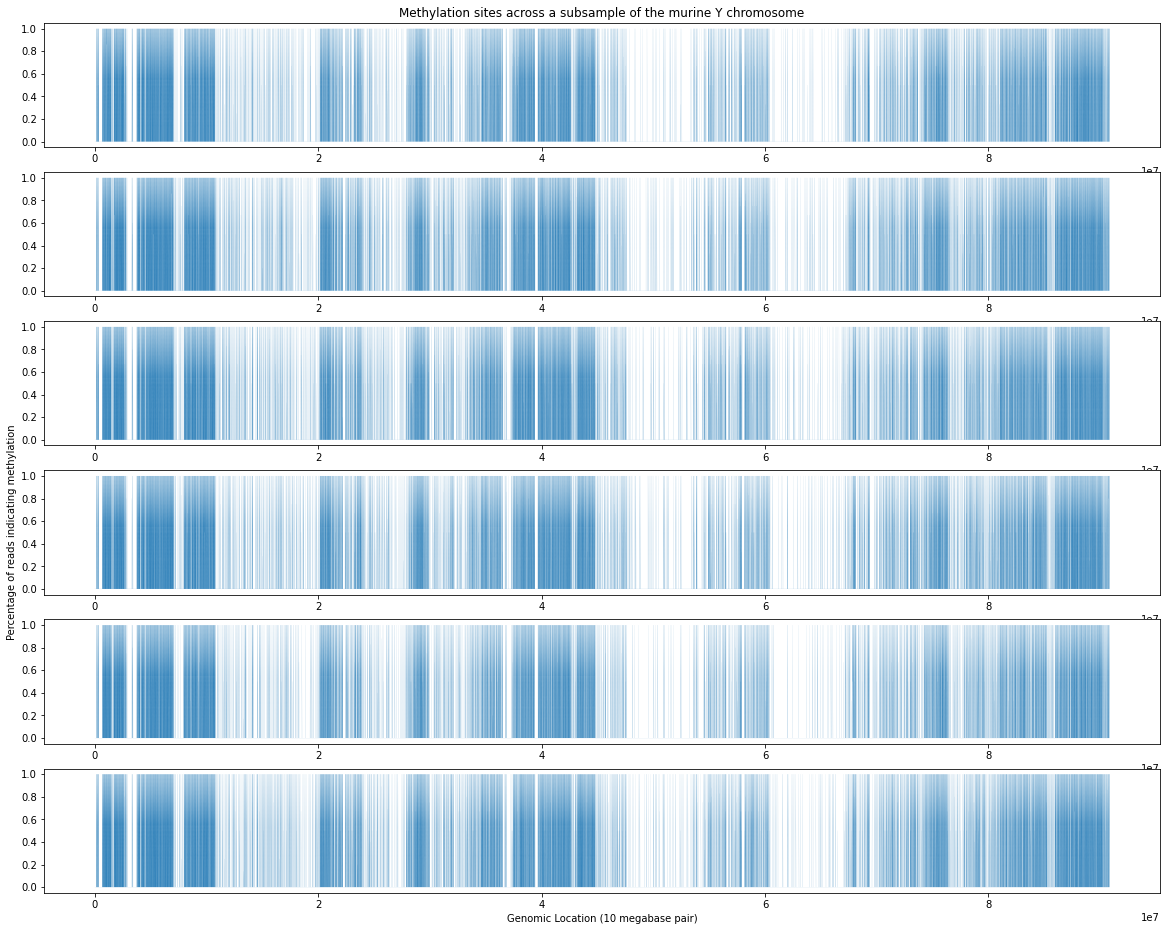

In [38]:
fig, ax = plt.subplots(6)
linewidth = 0.05
ax[0].plot(allData['ZT00'], linewidth=linewidth)
ax[1].plot(allData['ZT03'], linewidth=linewidth)
ax[2].plot(allData['ZT06'], linewidth=linewidth)
ax[3].plot(allData['ZT09'], linewidth=linewidth)
ax[4].plot(allData['ZT12'], linewidth=linewidth)
ax[5].plot(allData['ZT16'], linewidth=linewidth)

ax[5].set_xlabel('Genomic Location (10 megabase pair)')
ax[3].set_ylabel('Percentage of reads indicating methylation')
ax[0].set_title('Methylation sites across a subsample of the murine Y chromosome')

width = 20
height = 16
fig.set_size_inches(width, height)

As can be seen in the above graphs, visually there is very little change (the most notable being in the 40mbp and 60mbp regions). This can be explained by the fact that the changes in the count of methylated bases make up such a small amount of the data. Methylated bases change by ~10kbp in 90mbp of chromosome ( 0.01% ).

## Regions in Detail
Next, we will look at those regions in detail.

In [39]:
around40 = allData.loc[(allData['chromStart'] >= 37500000) & (allData['chromStart'] <= 52500000)].fillna(0.0)
around60 = allData.loc[(allData['chromStart'] >= 60000000) & (allData['chromStart'] <= 70000000)].fillna(0.0)

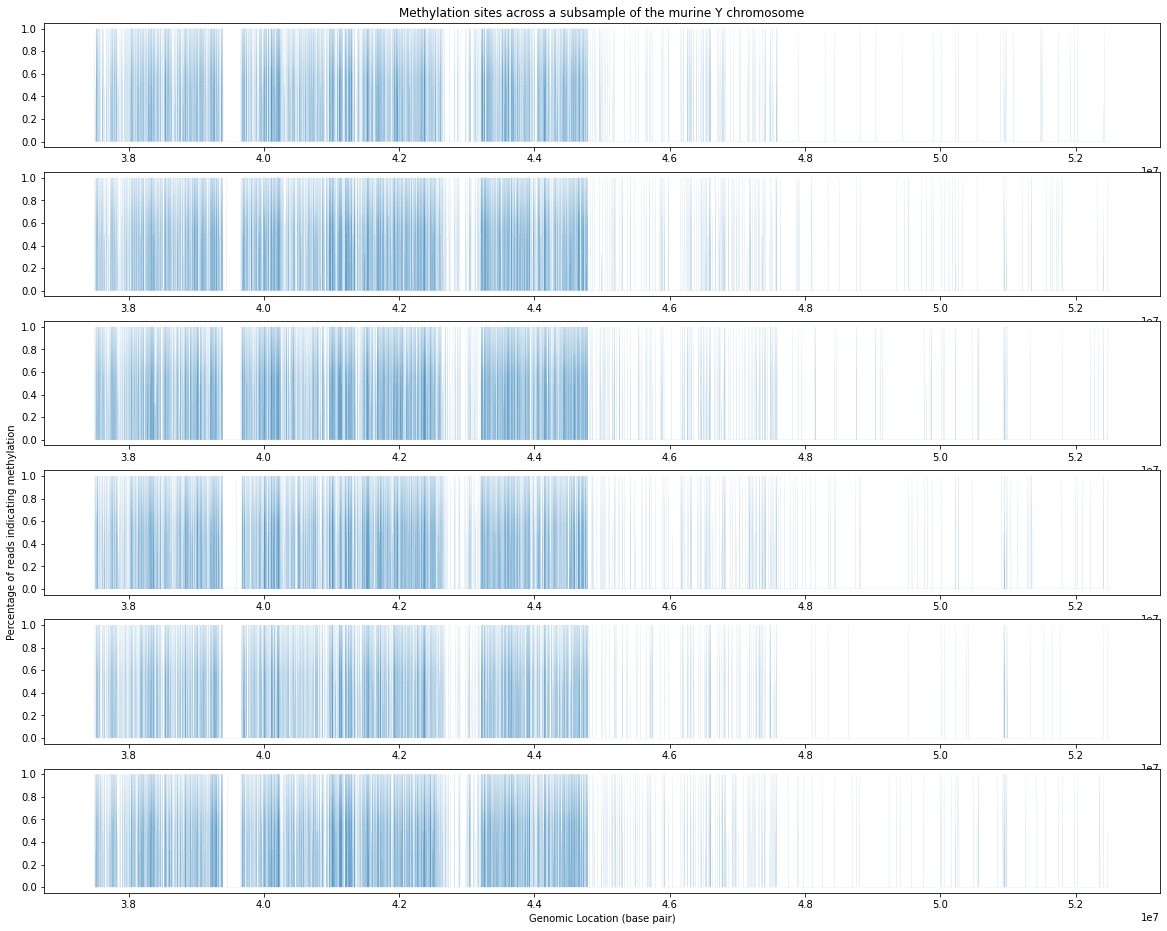

In [40]:
fig, ax = plt.subplots(6)
linewidth = 0.05

# Plot data
ax[0].plot(around40['ZT00'], linewidth=linewidth)
ax[1].plot(around40['ZT03'], linewidth=linewidth)
ax[2].plot(around40['ZT06'], linewidth=linewidth)
ax[3].plot(around40['ZT09'], linewidth=linewidth)
ax[4].plot(around40['ZT12'], linewidth=linewidth)
ax[5].plot(around40['ZT16'], linewidth=linewidth)

# Set Labels 
ax[5].set_xlabel('Genomic Location (base pair)')
ax[3].set_ylabel('Percentage of reads indicating methylation')
ax[0].set_title('Methylation sites across a subsample of the murine Y chromosome')

width = 20
height = 16
fig.set_size_inches(width, height)

The most notable change in this region is at 44mbp where there are genes linked to Y-linked testis-specific protein 1-like proteins.

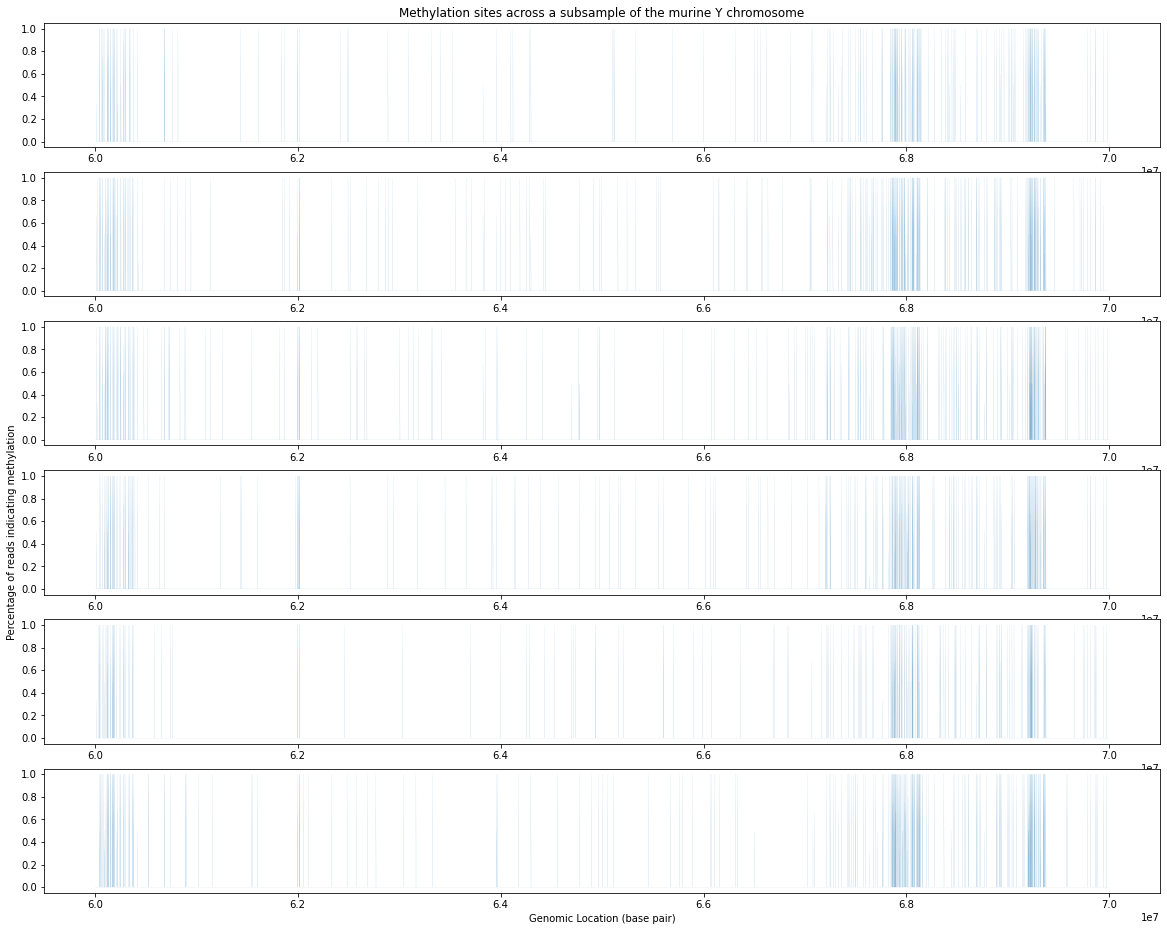

In [41]:
fig, ax = plt.subplots(6)
linewidth = 0.05

# Plot Data
ax[0].plot(around60['ZT00'], linewidth=linewidth)
ax[1].plot(around60['ZT03'], linewidth=linewidth)
ax[2].plot(around60['ZT06'], linewidth=linewidth)
ax[3].plot(around60['ZT09'], linewidth=linewidth)
ax[4].plot(around60['ZT12'], linewidth=linewidth)
ax[5].plot(around60['ZT16'], linewidth=linewidth)

# Set Labels
ax[5].set_xlabel('Genomic Location (base pair)')
ax[3].set_ylabel('Percentage of reads indicating methylation')
ax[0].set_title('Methylation sites across a subsample of the murine Y chromosome')

width = 20
height = 16
fig.set_size_inches(width, height)

Interestingly, the genes found at the 60-61mbp range are genes ( most notably (mn) Gm28891 ) for spermatid development, and the graph above shows that they become more methylated at night.
This is the same case at ~68mbp (mn Gm20937 ) and ~70mpb (mn Gm21160 ) where there are genes for spermatid development and Y-linked testis-specific protein 1-like proteins, respectively.

## Identify a model that contains a representation of part of your system

First we will solve and graph the biomodel example from the biomodel produced by Bertozzi (2020) which aimed to provide an SIR model of COVID-19 spread in California (CA) and New York (NY). 

Second, this graph could be expanded to model the current (27th July, 2022) COVID-19 resurgence in England, UK. This will focus on England due to the unique performance in COVID-19 control relative to neigbouring countries.

The initial number of infected: the total number of people thought to have COVID-19 as of 27th July, 2022. According to ONS data this is 3.2 million individuals or 5.7% of those living in England.


In [42]:
# First install smbltoodepy and import it to the environment.
!pip3 install sbmltoodepy

Defaulting to user installation because normal site-packages is not writeable


In [43]:
import sbmltoodepy
import numpy as np

# COVID-19 Model

Make a new folder to store data and download the Bertozzi (2020) model from BioModels.

**NOTE** As of time of submission the biomodel site has crashed and it is unknown when the service will be running again, the model file will be available on the GitHub page for this coursework.

In [23]:
!mkdir data_model
!wget https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000956.9?filename=Bertozzi2020.xml -O bertozzi.xml
!mv bertozzi.xml data_model/

mkdir: data_model: File exists
--2022-07-27 12:18:01--  https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000956.9?filename=Bertozzi2020.xml
Resolving www.ebi.ac.uk (www.ebi.ac.uk)... 193.62.192.80
Connecting to www.ebi.ac.uk (www.ebi.ac.uk)|193.62.192.80|:443... connected.
HTTP request sent, awaiting response... 500 Internal Server Error
2022-07-27 12:18:01 ERROR 500: Internal Server Error.



Use SBML to ODE to convert the Bertozzi model into an ODE model for use in Python with new data.

**NOTICE** Because of the afore mentioned error, this step also fails. However as a back up is available (in the associated GitHub repo) it can still be imported.

In [22]:
sbmltoodepy.ParseAndCreateModel("./data_model/bertozzi.xml", outputFilePath = "bertozzi_model.py", className = "BertozziModel")

AssertionError: 

In [45]:
from data_model/bertozzi_model import BertozziModel

SyntaxError: invalid syntax (<ipython-input-45-a722da942c0b>, line 1)

In [25]:
modelInstance = BertozziModel()
print(f"True (1) / false (0) is lockdown active: {modelInstance.p['Trigger_CA'].value}")
print(f"Lockdown start date: {modelInstance.p['Lockdown_CA_start'].value}")
print(f"Lockdown end date:   {modelInstance.p['Lockdown_CA_end'].value}")
print(f"Number of initial infected: {modelInstance.s['Infected'].concentration}")

True (1) / false (0) is lockdown active: 1.0
Lockdown start date: 27.0
Lockdown end date:   66.0
Number of initial infected: 1.263902932254803e-07


The above is used to confirm the variables set out for use in the original paper. The models will be run simulating 161 days to mimick the original paper.

In [28]:
time = 161

times = np.zeros(time)
times[0] = modelInstance.time
infected = np.zeros(time)
infected[0] = modelInstance.s['Infected'].concentration

timeinterval = 1
for i in range(time - 1):
    modelInstance.RunSimulation(timeinterval)
    times[i+1] = modelInstance.time
    infected[i+1] = modelInstance.s['Infected'].concentration

# Set Trigger Lockdown = 1
modelInstanceLockdown = BertozziModel()
modelInstanceLockdown.p['Trigger_Lockdown']  = sbmltoodepy.modelclasses.Parameter(1.0, 'Trigger_Lockdown', True, metadata = sbmltoodepy.modelclasses.SBMLMetadata("Trigger_Lockdown"))

timeinterval = 1
infectedL = np.zeros(time)
infectedL[0] = modelInstanceLockdown.s['Infected'].concentration
start = np.zeros(time)
start[0] = modelInstanceLockdown.p['Lockdown_CA_start'].value
end = np.zeros(time)
end[0] = modelInstanceLockdown.p['Lockdown_CA_end'].value
for i in range(time - 1):
    modelInstanceLockdown.RunSimulation(timeinterval)
    infectedL[i+1] = modelInstanceLockdown.s['Infected'].concentration
    start[i+1] = modelInstanceLockdown.p['Lockdown_CA_start'].value
    end[i+1] = modelInstanceLockdown.p['Lockdown_CA_end'].value

If we were to plot the graph at this point the two lines would be identical, even given changing of parameters. Reading through the bertozzi_model.py file, however, it was realised that the Lockdown start and end values were constants used for the manipulation of the data outside of the SMBL to ODE framework. With this in mind, the following code was added:

In [29]:
lockstart = int(modelInstanceLockdown.p['Lockdown_CA_start'].value)
prepended_infected = np.concatenate(([0] * lockstart, infectedL), axis=0)
appended_infected = prepended_infected[:-lockstart]

This can now be plotted, mimicking the graph found in the original Bertozzi (2020) paper.

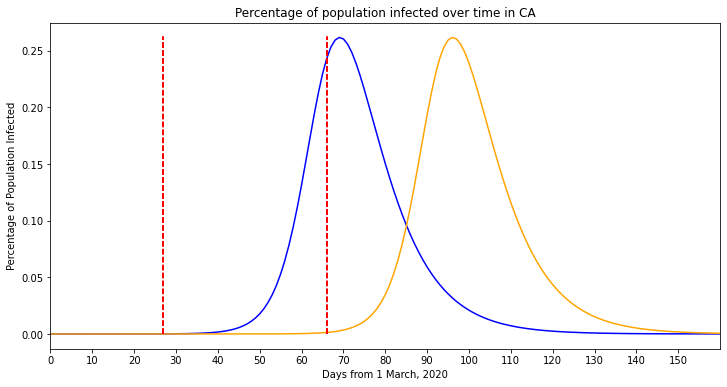

In [30]:
fig, ax = plt.subplots()
ax.plot(times,infected, c='blue')
ax.plot(times,appended_infected, c='orange')
ax.plot(start, infected, '--', c='red')
ax.plot(end, infected, '--', c='red')

ax.set_xlabel('Days from 1 March, 2020')
ax.set_ylabel('Percentage of Population Infected')
ax.set_title('Percentage of population infected over time in CA')
ax.xaxis.set_ticks(np.arange(min(times), max(times), 10))
ax.set_xlim(0, 160)
fig.set_size_inches(12,6)


Taking into acount the limited modelling of this model, it seems accurate that this model relied significantly on graph manipulation.

## England COVID-19 SRI graph

The above model can now be applied to new data, we will use the current COVID-19 outbreak in England (interesting due to the unique method of control England employs).

We will need to overwrite the hardcoded data in the Bertozzi model with the following data:

- The R value for England is estimated at 0.9-1.2 (https://www.gov.uk/guidance/the-r-value-and-growth-rate#latest-r-and-growth-rate-for-england, updated 22nd July). We will use the values 1.0, 1.2 and 1.4 for modelling.
- The current number of infected persons is estimated at 3.0-3.2 million, we will use the worse case estimate (https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/conditionsanddiseases/bulletins/coronaviruscovid19infectionsurveypilot/latest#coronavirus-covid-19-infection-survey-data Updated week ending 13th July).
- The population of England is estimated to be 56.55 million people (https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates, updated 25th June 2022).

In [31]:
# Set time (Days) to generate data over (this is required so that the "infection end" can also be graphed)
time = 200

# Set other initial values
initial_infected = 3.2e+6

england_pop = 56550000.0
secondary_pop = 0.0

Models will now be generated per R value, this will require creating a new model instance (not doing so will lead to errors in some calculations) being made and the initial values to be set for that instance.

In [32]:
# Generate model using the new initial values and R = 1.0

engSRI = BertozziModel()
engSRI.p['Trigger_Lockdown']  = sbmltoodepy.modelclasses.Parameter(0.0, 'Trigger_Lockdown', True, metadata = sbmltoodepy.modelclasses.SBMLMetadata("Trigger_Lockdown"))
engSRI.p['Pop_CA'] = sbmltoodepy.modelclasses.Parameter(england_pop, 'Pop_CA', True, metadata = sbmltoodepy.modelclasses.SBMLMetadata("Pop_CA"))
engSRI.p['Ro_CA'] = sbmltoodepy.modelclasses.Parameter(1.0, 'Ro_CA', False, metadata = sbmltoodepy.modelclasses.SBMLMetadata("Ro_CA"))
engSRI.s['Infected'] = sbmltoodepy.modelclasses.Species(initial_infected, 'Concentration', engSRI.c['USA___CA__NY'], False, constant = False, metadata = sbmltoodepy.modelclasses.SBMLMetadata("Infected"))
engSRI.p['Pop_NY'] = sbmltoodepy.modelclasses.Parameter(secondary_pop, 'Pop_NY', True, metadata = sbmltoodepy.modelclasses.SBMLMetadata("Pop_NY"))

times = np.zeros(time)
times[0] = engSRI.time
infected = np.zeros(time)
infected[0] = engSRI.s['Infected'].concentration

timeinterval = 1
for i in range(time - 1):
    engSRI.RunSimulation(timeinterval)
    times[i+1] = engSRI.time
    infected[i+1] = engSRI.s['Infected'].concentration

In [33]:
# Generate model using the new initial values and R = 1.2

engSRI = BertozziModel()
engSRI.p['Trigger_Lockdown']  = sbmltoodepy.modelclasses.Parameter(0.0, 'Trigger_Lockdown', True, metadata = sbmltoodepy.modelclasses.SBMLMetadata("Trigger_Lockdown"))
engSRI.p['Pop_CA'] = sbmltoodepy.modelclasses.Parameter(england_pop, 'Pop_CA', True, metadata = sbmltoodepy.modelclasses.SBMLMetadata("Pop_CA"))
engSRI.p['Ro_CA'] = sbmltoodepy.modelclasses.Parameter(1.2, 'Ro_CA', False, metadata = sbmltoodepy.modelclasses.SBMLMetadata("Ro_CA"))
engSRI.s['Infected'] = sbmltoodepy.modelclasses.Species(initial_infected, 'Concentration', engSRI.c['USA___CA__NY'], False, constant = False, metadata = sbmltoodepy.modelclasses.SBMLMetadata("Infected"))
engSRI.p['Pop_NY'] = sbmltoodepy.modelclasses.Parameter(secondary_pop, 'Pop_NY', True, metadata = sbmltoodepy.modelclasses.SBMLMetadata("Pop_NY"))



times = np.zeros(time)
times[0] = engSRI.time
infected2 = np.zeros(time)
infected2[0] = engSRI.s['Infected'].concentration

timeinterval = 1
for i in range(time - 1):
    engSRI.RunSimulation(timeinterval)
    times[i+1] = engSRI.time
    infected2[i+1] = engSRI.s['Infected'].concentration

In [34]:
# Generate model using the new initial values and R = 1.4

engSRI = BertozziModel()
engSRI.p['Trigger_Lockdown']  = sbmltoodepy.modelclasses.Parameter(0.0, 'Trigger_Lockdown', True, metadata = sbmltoodepy.modelclasses.SBMLMetadata("Trigger_Lockdown"))
engSRI.p['Pop_CA'] = sbmltoodepy.modelclasses.Parameter(england_pop, 'Pop_CA', True, metadata = sbmltoodepy.modelclasses.SBMLMetadata("Pop_CA"))
engSRI.p['Ro_CA'] = sbmltoodepy.modelclasses.Parameter(1.4, 'Ro_CA', False, metadata = sbmltoodepy.modelclasses.SBMLMetadata("Ro_CA"))
engSRI.s['Infected'] = sbmltoodepy.modelclasses.Species(initial_infected, 'Concentration', engSRI.c['USA___CA__NY'], False, constant = False, metadata = sbmltoodepy.modelclasses.SBMLMetadata("Infected"))
engSRI.p['Pop_NY'] = sbmltoodepy.modelclasses.Parameter(secondary_pop, 'Pop_NY', True, metadata = sbmltoodepy.modelclasses.SBMLMetadata("Pop_NY"))



times = np.zeros(time)
times[0] = engSRI.time
infected3 = np.zeros(time)
infected3[0] = engSRI.s['Infected'].concentration

timeinterval = 1
for i in range(time - 1):
    engSRI.RunSimulation(timeinterval)
    times[i+1] = engSRI.time
    infected3[i+1] = engSRI.s['Infected'].concentration

/Users/dp24/Library/Python/3.8/lib/python/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/Users/dp24/Library/Python/3.8/lib/python/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/Users/dp24/Library/Python/3.8/lib/python/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/Users/dp24/Library/Python/3.8/lib/python/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/Users/dp24/Library/Python/3.8/lib/python/site-packages/matplotlib/text.py:1215: Fut

Text(0.5, 1.0, 'R = 1.4')

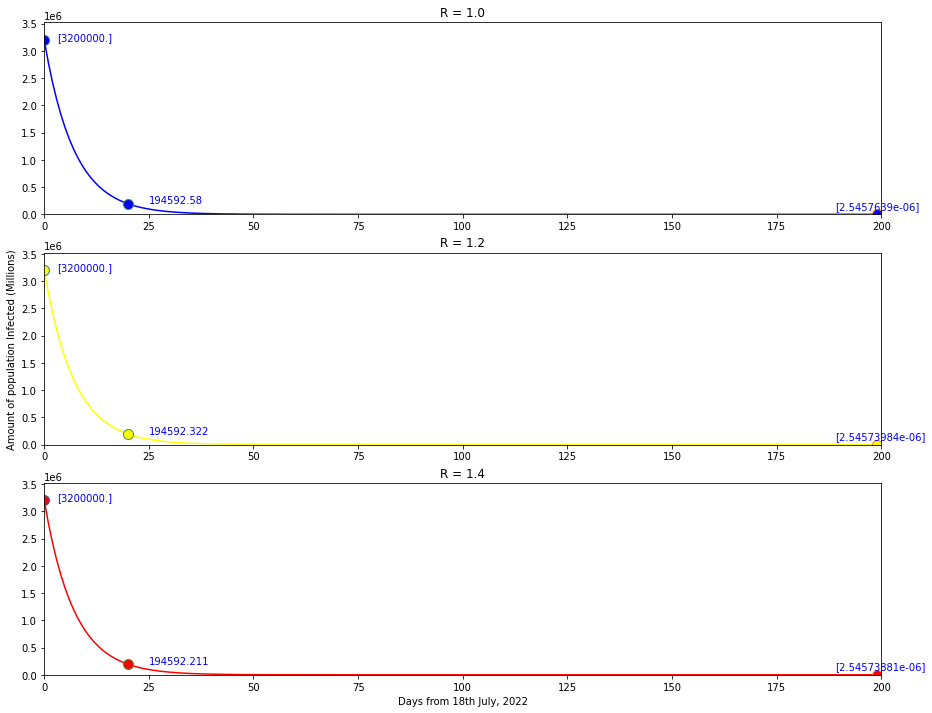

In [36]:
# Max value in array
R11max = np.where(infected == max(infected))
R12max = np.where(infected2 == max(infected2))
R13max = np.where(infected3 == max(infected3))

# Min positive value in array (this will return a fraction of a person)
R11 = np.where(infected == min(infected))
R12 = np.where(infected2 == min(infected2))
R13 = np.where(infected3 == min(infected3))

# Set number of figure subplots and their organisation
fig, ax = plt.subplots(3)

xlim_max = 200
ylim_max = initial_infected + (initial_infected / 10)

# Set figure dimensions
fig.set_size_inches(15,12)

# Figure 1 for R = 1.0
ax[0].set_xlim(0, xlim_max)
ax[0].set_ylim(0, ylim_max)
ax[0].plot(times,infected ,c='blue')

# Annotate maximum infection count
ax[0].annotate(infected[R11max[0]] , (times[R11max[0]] + 3, infected[R11max[0]]), c='blue')
ax[0].plot(times[R11max[0]], infected[R11max[0]] ,
        marker='o', markerfacecolor="blue",
        markersize=10)

# Annotate minimum infection count
ax[0].annotate(infected[R11] , (times[R11] - 10, infected[R11] + 100000), c='blue')
ax[0].plot(times[R11], infected[R11] ,
        marker='o', markerfacecolor="blue",
        markersize=10)

# Annotate infection count at day 20
ax[0].annotate(round(infected[20], 3), (times[20] + 5, infected[20]), c='blue')
ax[0].plot(times[20], infected[20] ,
        marker='o', markerfacecolor="blue",
        markersize=10)

# Figure 2 for R = 1.2
ax[1].set_xlim(0, xlim_max)
ax[1].set_ylim(0, ylim_max)
ax[1].plot(times,infected2,c='yellow')

# Annotate maximum infection count
ax[1].annotate(infected2[R12max[0]], (times[R12max[0]] + 3, infected2[R12max[0]]), c='blue')
ax[1].plot(times[R12max[0]], infected2[R12max[0]] ,
        marker='o', markerfacecolor="yellow",
        markersize=10)

# Annotate minimum infection count
ax[1].annotate(infected2[R12[0]], (times[R12[0]] - 10, infected2[R12[0]] + 100000), c='blue')
ax[1].plot(times[R12], infected2[R12] ,
        marker='o', markerfacecolor="yellow",
        markersize=10)

# Annotate infection count at day 20
ax[1].annotate(round(infected2[20], 3), (times[20] + 5, infected2[20]), c='blue')
ax[1].plot(times[20], infected2[20] ,
        marker='o', markerfacecolor="yellow",
        markersize=10)

# Figure 3 for R = 1.4
ax[2].set_xlim(0, xlim_max)
ax[2].set_ylim(0, ylim_max)
ax[2].plot(times,infected3 ,c='red')

# Annotate maximum infection count
ax[2].annotate(infected3[R13max[0]], (times[R13max[0]] + 3, infected3[R13max[0]]), c='blue')
ax[2].plot(times[R13max[0]], infected3[R13max[0]] ,
        marker='o', markerfacecolor="red",
        markersize=10)

# Annotate minimum infection count
ax[2].annotate(infected3[R13], (times[R13] - 10, infected3[R13] + 100000), c='blue')
ax[2].plot(times[R13], infected3[R13] ,
        marker='o', markerfacecolor="red",
        markersize=10)

# Annotate infection count at day 20
ax[2].annotate(round(infected3[20], 3), (times[20] + 5, infected3[20]), c='blue')
ax[2].plot(times[20], infected3[20] ,
        marker='o', markerfacecolor="red",
        markersize=10)

# Set the axis Labels
ax[2].set_xlabel('Days from 18th July, 2022')
ax[1].set_ylabel('Amount of population Infected (Millions)')

# Set titles for graphs
ax[0].set_title("R = 1.0")
ax[1].set_title("R = 1.2")
ax[2].set_title("R = 1.4")

As can be seen above the model, with the initial value of 3.2 million infected, the graph drops quickly in all cases, with near identical case numbers. By day 20 (theoretically 15th August), all models predict that there would be just under 200,000 infected people in the population. 

This is the case even with an initial R value of 10. Changing the initial infected variable even in the original model with no other modifications produces graphs which do not behave as one would expect.

For a more typical graph, the model requires an initial infected value to be almost 0. Which erases any use of this model after the primary infection of a population (e.g. December 2019/January 2020).

This indicates that the model is too specific to the original data and cannot be easily applied to new data as above. Using the above data we should see an initial increase until the population is saturated or a lockdown decreases the R value to the point where the infection is not self-sustaining.

# Methylation Data - Model

We can also visualise the model produced by Leloup on methylation data.

**NOTICE** as with the above model, BioModels is down. A backup copy of the model is available in the GitHub Repo for this coursework.

In [37]:
# Download the model from BioModels
!mkdir data_model
!wget https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000298.2?filename=BIOMD0000000298_url.xml -O leloup.xml
!mv leloup.xml data_model/

mkdir: data_model: File exists
--2022-07-27 12:44:21--  https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000298.2?filename=BIOMD0000000298_url.xml
Resolving www.ebi.ac.uk (www.ebi.ac.uk)... 193.62.192.80
Connecting to www.ebi.ac.uk (www.ebi.ac.uk)|193.62.192.80|:443... connected.
HTTP request sent, awaiting response... 500 Internal Server Error
2022-07-27 12:44:21 ERROR 500: Internal Server Error.



In [38]:
# import sbmltoode to env
import sbmltoodepy

In [39]:
sbmltoodepy.ParseAndCreateModel("./data_model/leloup.xml", outputFilePath = "leloup_model.py", className = "LeloupModel")

AssertionError: 

Initiate a new model from the python file and load into the environment.

In [41]:
from leloup_model import LeloupModel

In [42]:
modelInstance = LeloupModel()

In [43]:
print(modelInstance.s.keys())
print(modelInstance.p.keys())
print(modelInstance.p['Pt'].value)

dict_keys(['MP', 'CN', 'C', 'T2', 'T1', 'T0', 'MT', 'P0', 'P1', 'P2'])
dict_keys(['vsP', 'vmP', 'KmP', 'KIP', 'Pt', 'ksP', 'vdP', 'KdP', 'vsT', 'vmT', 'KmT', 'KIT', 'ksT', 'vdT', 'KdT', 'kdC', 'kdN', 'k1', 'k2', 'k3', 'k4', 'kd', 'V1P', 'V1T', 'V2P', 'V2T', 'V3P', 'V3T', 'V4P', 'V4T', 'K1P', 'K1T', 'K2P', 'K2T', 'K3P', 'K3T', 'K4P', 'K4T', 'n'])
1.6474592000000001


In [44]:
time = 151

import numpy as np
times = np.zeros(time)
times[0] = modelInstance.time
MP = np.zeros(time)
MP[0] = modelInstance.s['MP'].concentration
CN = np.zeros(time)
CN[0] = modelInstance.s['CN'].concentration
Pt = np.zeros(time)
Pt[0] = modelInstance.p['Pt'].value
vdT = np.zeros(time)
vdT[0] = modelInstance.p['vdT'].value
timeinterval = 1
for i in range(time - 1):
    modelInstance.RunSimulation(timeinterval)
    times[i+1] = modelInstance.time
    MP[i+1] = modelInstance.s['MP'].concentration
    CN[i+1] = modelInstance.s['CN'].concentration
    Pt[i+1] = modelInstance.p['Pt'].value
    vdT[i+1] = modelInstance.p['vdT'].value

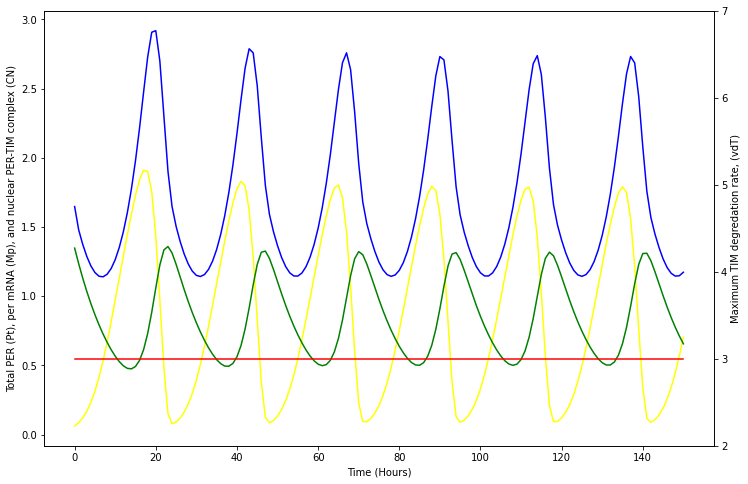

In [45]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Set 2nd y-axis
ax2 = ax1.twinx()

# Plot 1 data
ax1.plot(times,MP, c='yellow')
ax1.plot(times,CN, c='green')
ax1.plot(times,Pt, c='blue')

# Plot 2 data
ax2.plot(times,vdT, c='red')
ax2.set_ylim([2, 7])

# Set Labels
ax1.set_xlabel('Time (Hours)')
ax1.set_ylabel('Total PER (Pt), per mRNA (Mp), and nuclear PER-TIM complex (CN)')
ax2.set_ylabel('Maximum TIM degredation rate, (vdT)')


fig.set_size_inches(12, 8)

# Utilise a statistical tool to identify oscillation in methylation

Once again using the methylation, we will now attempt to identify regions of oscilating methylation. It should be noted that due to the fact these data only occur over 1 24 hour period, any results are not true oscilations; they only show that there was indeed a change. Further research needs to be conducted to look at the same research but over a period of > 3 days.

For this example we will specifically look at the 68-70mbp region.

In [46]:
rhythmData = around60[(around60['chromStart'] >= 6800000) & (around60['chromStart'] <= 70000000)]

Filter out rows where all results are 0, as this would simply add to noise in the graph.

In [47]:
filteredRyhthm = rhythmData[(rhythmData['ZT00'] != 0) & 
                            (rhythmData['ZT03'] != 0) & 
                            (rhythmData['ZT06'] != 0) & 
                            (rhythmData['ZT09'] != 0) &
                            (rhythmData['ZT12'] != 0) &
                            (rhythmData['ZT16'] != 0)]

Set the index to stop the 'chromStart' column from interferring with the calculations in the FFT.

In [48]:
filteredRyhthm.set_index('chromStart', inplace=True)

This does require dropping the Unnamed: 0 column that is an artifact from the TSV file. Assign to self as this function is not inplace.

In [57]:
filteredRyhthm = filteredRyhthm.drop(['Unnamed: 0'], axis=1)

This heatmap shows the change in expression across these 73 filtered results.

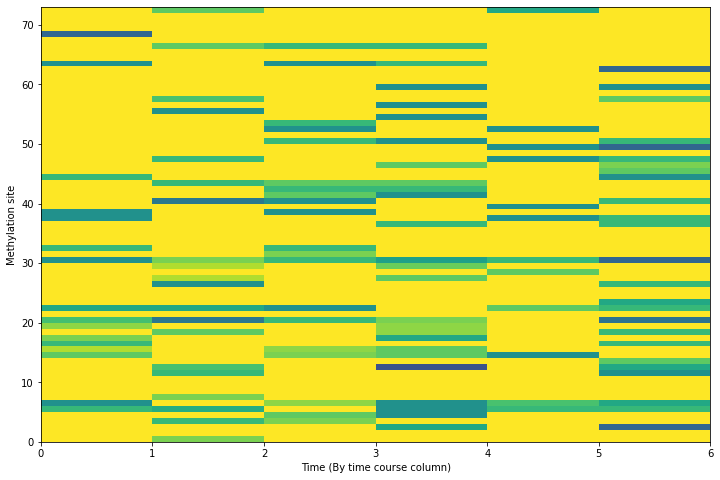

In [58]:
fig, ax = plt.subplots()
ax.pcolormesh(filteredRyhthm, vmax = 1.0, vmin = 0.0)

ax.set_xlabel('Time (By time course column)')
ax.set_ylabel('Methylation site')

fig.set_size_inches(12, 8)

These data can also be plotted in the form of a line graph to show any indication of oscilation patterns across the methylated sites of the Y chromosome.

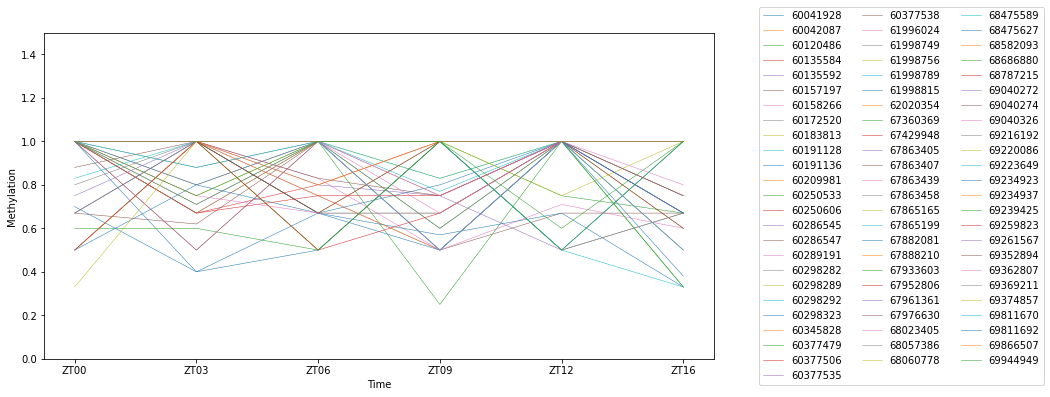

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
filteredRyhthm.T.plot(ax=ax, lw=.5)
ax.set_ylim(0, 1.5)
ax.set_xlabel('Time')
ax.set_ylabel('Methylation')
ax.legend(loc='right', bbox_to_anchor=(1.5, 0.5), ncol=3)


This clearly is not filtered enough to make any conclusion with, so we will filter for a sequence at ~68mbp. 

In [65]:
smallerRhythm =  around60[(around60['chromStart'] >= 67900000) & (around60['chromStart'] <= 67940000)]

In [66]:
smallerRhythm = smallerRhythm[(smallerRhythm['ZT00'] != 0) & 
                            (smallerRhythm['ZT03'] != 0) & 
                            (smallerRhythm['ZT06'] != 0) & 
                            (smallerRhythm['ZT09'] != 0) &
                            (smallerRhythm['ZT12'] != 0) &
                            (smallerRhythm['ZT16'] != 0)]
smallerRhythm.set_index('chromStart', inplace=True)

In [67]:
smallerRhythm = smallerRhythm.drop(['Unnamed: 0'], axis=1)
smallerRhythm

,ZT00,ZT03,ZT06,ZT09,ZT12,ZT16
chromStart,,,,,,
67933603,1.0,1.0,0.67,0.67,1.0,1.0


The following graph shows that this site indeed goes through a change in methylation.

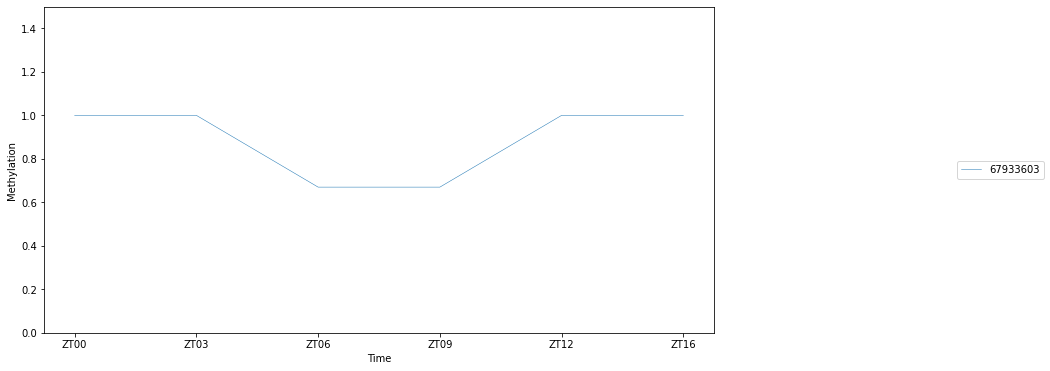

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
smallerRhythm.T.plot(ax=ax, lw=.5)
ax.set_ylim(0, 1.5)
ax.set_xlabel('Time')
ax.set_ylabel('Methylation')
ax.legend(loc='right', bbox_to_anchor=(1.5, 0.5))


We can now perform a Fourier Transform and find the spectral density of the signal. First, we must import the right scipy modules.

In [69]:
import scipy as sp
import scipy.fftpack

In the case of these data, the dataframe had to be transposed.

In [70]:
smallerRhythm = smallerRhythm.T

In [71]:
temp_fft = sp.fftpack.fft(smallerRhythm)

At this point we have the Fast Fourier Transform (FFT) values which we must square in order to get the power spectral density (PSD) values.

In [72]:
temp_psd = np.abs(temp_fft) ** 2

As we have 6 time zones to account for, the time dimension needs to be divided by 6.

In [73]:
fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1/6)

To return positive values as the above returns negative values too, we perform:

In [74]:
i = fftfreq > 0

This can now be plotted on the frequency domain.

Text(0, 0.5, 'PSD (dB)')

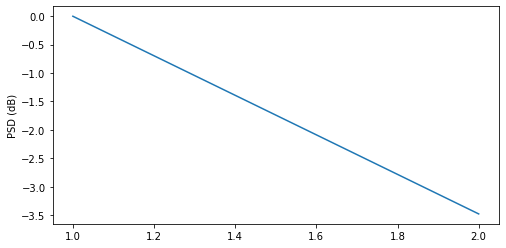

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(temp_psd[i]))
ax.set_xlabel('')
ax.set_ylabel('PSD (dB)')

In [76]:
temp_fft_bis = temp_fft.copy()
temp_fft_bis[np.abs(fftfreq) > 1.1] = 0

At this point an inverse FFT can be performed to apply the temporal domain back to the data. This returns a fundemental signal

In [77]:
temp_slow = np.real(sp.fftpack.ifft(temp_fft_bis))

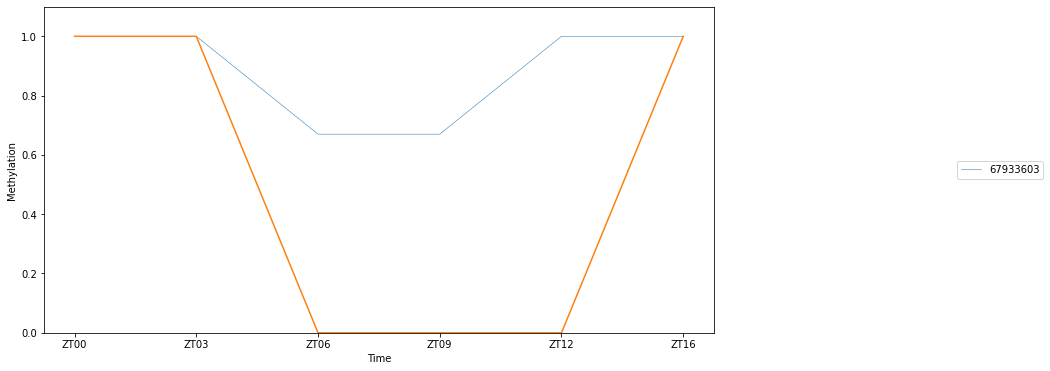

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
smallerRhythm.plot(ax=ax, lw=.5)
ax.plot(temp_slow, '-')
ax.set_ylim(0, 1.1)
ax.set_xlabel('Time')
ax.set_ylabel('Methylation')
ax.legend(loc='right', bbox_to_anchor=(1.5, 0.5), ncol=3)


This plot shows that relative to the data, the change in methylation is significant across this stretch of time.

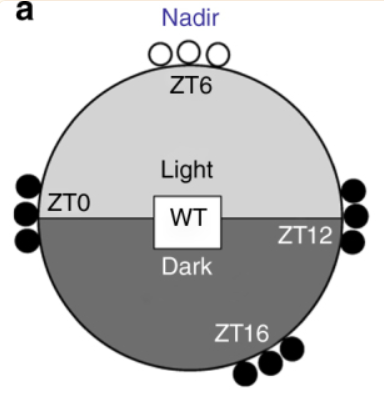

Figure 1: A graphical representation of the day/night cycle the mice were exposed to in this experiment, adapted from Figure 4a of Coulson (2018).

The above graph indicates that there could be some ocilation in the region of 67.90 mbp to 67.97 mbp of chromosome Y. The nucleotide at position 67933603 bp shows a change in the percentage of reads indicating methylation, this could be an indicator of the change in silencing of a gene over time; in this case, at the period before dark, see Figure 1 (above). The gene that this nucleotide affects is in the middle of, a transcribed yet unprocessed pseudogene, Gm29218.

# Network Graph


Here a graph which maps the presence of the CSD (complementary sex determination) gene and its ancestral FEM (feminiser) gene to the genomes of 4 Apis sp. and 5 Bombus sp. from the Hymenoptera Genome Database (https://hymenoptera.elsiklab.missouri.edu/).

In [11]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Import the data output from BLASTN against:

- Apis cerana
- Apis mellifera
- Apis dorsata
- Apis florea

- Bombus bifarius (no hits in final data)
- Bombus impatiens (no hits in final data)
- Bombus terrestris
- Bombus vacouverensis
- Bombus vosnesenskii

Apis sp. were selected as the CSD gene is thought to have originated in the genus.

Bombus sp. are closely related but thought to not carry a CSD that is particularly similar to Apis. It is possible that Bombus may carry MSD (multiple sex determining regions).

Now read in the data, creating a new org column to group scaffold level hits to each assembly.

In [12]:
dataFEM = pd.read_csv("./data_networkx/femVsApisBombus.tsv", '\t')
dataFEM[['Org','accession']] = dataFEM['subject_id'].str.split('|', expand=True)

dataCSD = pd.read_csv("./data_networkx/csdVsApisBombus.tsv", '\t')
dataCSD[['Org','accession']] = dataCSD['subject_id'].str.split('|', expand=True)

Confirm column headers.

In [13]:
dataFEM.columns.values

array(['query_id', 'query_gi', 'query_acc', 'subject_id', 'subject_gi',
       'subject_gis', 'subject_acc', 'subject_acc.1', 'q_start', 'q_end',
       's_start', 's_end', 'query_seq', 'subject_seq', 'evalue',
       'bit_score', 'score', 'alignment_length', '%_identity',
       'identical', 'mismatches', 'positives', 'gap_opens', 'gaps',
       '%_positives', 'query/sbjct_frames', 'query_frame', 'BTOP',
       'subject_tax_ids', 'subject_sci_names', 'subject_com_names',
       'subject_blast_names', 'subject_super_kingdoms', 'subject_title',
       'subject_titles', 'subject_strand', '%_query coverage_per_subject',
       '%_query_coverage_per_hsp', 'Org', 'accession'], dtype=object)

Get counts of the data, the columns with no data would be useful to have but will not be used.

In [14]:
print(f'FEM data: \n{dataFEM.count()}\n\nCSD data: \n{dataCSD.count()}')

FEM data: 
query_id                        7407
query_gi                        7407
query_acc                       7407
subject_id                      7407
subject_gi                      7407
subject_gis                     7407
subject_acc                     7407
subject_acc.1                   7407
q_start                         7407
q_end                           7407
s_start                         7407
s_end                           7407
query_seq                       7407
subject_seq                     7407
evalue                          7407
bit_score                       7407
score                           7407
alignment_length                7407
%_identity                      7407
identical                       7407
mismatches                      7407
positives                       7407
gap_opens                       7407
gaps                            7407
%_positives                     7407
query/sbjct_frames              7407
query_frame                

Filter the data for >90% identity and then filter for the first occurance of a subject species query (scaffold) with the highest % identity match. This cuts down the amount of data brought into the graph.

In [15]:
# This first block is for a more visually impressive graph
filteredDataFem = dataFEM[(dataFEM['%_identity'] > 90.00)]
filteredDataFem = filteredDataFem.groupby('subject_acc').apply(lambda g: g[g['%_identity'] == g['%_identity'].max()])
filteredDataFem.count()

# This block is for a more realistic graph, the gene is 9.4kbp, so filtering for 2000bp would remove errorneous matches
filteredDataFem2 = dataFEM[(dataFEM['%_identity'] > 90.00) & (dataFEM['alignment_length'] > 2000)]
filteredDataFem2 = filteredDataFem2.groupby('subject_acc').apply(lambda g: g[g['%_identity'] == g['%_identity'].max()])

In [16]:
# This first block is for a more visually impressive graph
filteredDataCSD = dataCSD[(dataCSD['%_identity'] > 90.00)]
filteredDataCSD = filteredDataCSD.groupby('subject_acc').apply(lambda g: g[g['%_identity'] == g['%_identity'].max()])
filteredDataCSD.count()

# This block is for a more realistic graph, the gene is 9.4kbp, so filtering for 2000bp would remove errorneous matches
filteredDataCSD2 = dataCSD[(dataCSD['%_identity'] > 90.00) & (dataCSD['alignment_length'] > 2000)]
filteredDataCSD2 = filteredDataCSD2.groupby('subject_acc').apply(lambda g: g[g['%_identity'] == g['%_identity'].max()])


Convert the pandas dataframe objects into graph format.

In [17]:
Gfem = nx.from_pandas_edgelist(filteredDataFem, 'query_id', 'subject_acc')
Hfem = nx.from_pandas_edgelist(filteredDataFem, 'Org', 'subject_acc')
Gcsd = nx.from_pandas_edgelist(filteredDataCSD, 'query_id', 'subject_acc')
Hcsd = nx.from_pandas_edgelist(filteredDataCSD, 'Org', 'subject_acc')
Ffem = nx.compose(Gfem,Hfem)
Fcsd = nx.compose(Gcsd, Hcsd)

Graph showing the results for CSD matches.

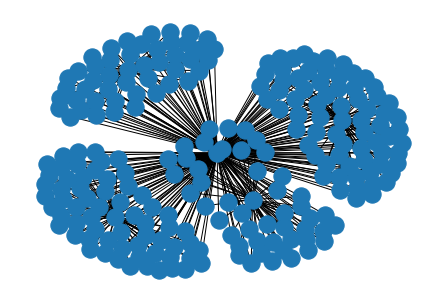

In [18]:
pos = nx.spring_layout(Fcsd, seed=225)
nx.draw(Fcsd, pos)

Graph showing the results for FEM matches.

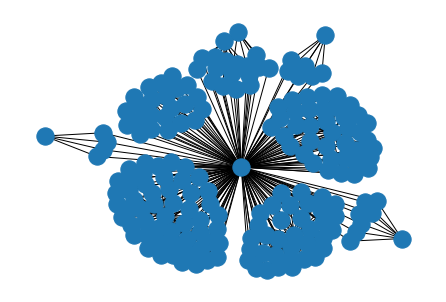

In [19]:
pos = nx.spring_layout(Ffem, seed=225)
nx.draw(Ffem, pos)

Now to create a graph with all data to show which species do and do not have the genes.

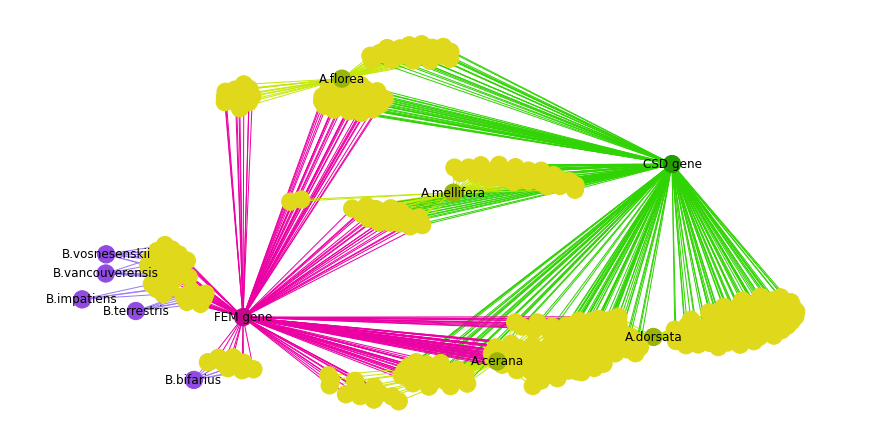

In [20]:
# Rename, inplace, the base node as the gene of interest for each graph
nx.relabel_nodes(Ffem, {0:"FEM"}, copy=False)
nx.relabel_nodes(Fcsd, {0:"CSD"}, copy=False)

# Merge the two individual graphs
FF = nx.compose(Ffem, Fcsd)

# Create Label dict, for the labels we want to show.
label_dict = {}
label_dict['CSD'] = 'CSD gene'
label_dict['FEM'] = 'FEM gene'
label_dict['Amel_HAv3.1'] = 'A.mellifera'
label_dict['Apis_dorsata_1.3'] = 'A.dorsata'
label_dict['Aflo_1.1'] = 'A.florea'
label_dict['ACSNU-2.0'] = 'A.cerana'
label_dict['Bvos_JDL3184-5_v1.1'] = 'B.vosnesenskii'
label_dict['Bvanc_JDL1245'] = 'B.vancouverensis'
label_dict['Bter_1.0'] = 'B.terrestris'
label_dict['BIMP_2.2'] = 'B.impatiens'
label_dict['Bbif_JDL3187'] = 'B.bifarius'


# Generate NODE colour mapping of species
colour_map = {'CSD':'#249c02', # darker green
             'FEM':'#c5078c', # darker pink
             'Amel_HAv3.1':'#9ab503',
             'ACSNU-2.0': '#9ab503',
             'Apis_dorsata_1.3':'#9ab503',
             'Aflo_1.1' : '#9ab503',
             'Bter_1.0': '#914be2',
             'Bvanc_JDL1245': '#914be2',
             'Bvos_JDL3184-5_v1.1': '#914be2',
             'BIMP_2.2': '#914be2',
             'Bbif_JDL3187': '#914be2'
             }

node_colours = [colour_map.get(node, '#E0D91B') for node in FF.nodes()]

# Generate Edge 
edge_colours = []
for i in FF.edges():
    if i[1] == 'CSD':
        edge_colours.append('#30d303') # light green
    elif i[1] == 'FEM':
        edge_colours.append('#eb00a4') # pink
    elif i[1].startswith('A'):
        edge_colours.append('#c5e704')
    else:
        # At this point only Bombus are left for assignment
        edge_colours.append('#9c7cee')

# Modify positions of key nodes to clean up the graph
pos = nx.spring_layout(FF, seed=100, weight='w')

pos2 = {}
for i, y in pos.items():
    if i == 'CSD':
        pos2[i] = np.array([0.65, 0.65])
    elif i == 'FEM':
        pos2[i] = np.array([-0.55, -0.55])
    elif i.startswith('Amel_HAv3.1'):
        pos2[i] = np.array([y[0]-0.1, y[1]])
    elif i.startswith('ACSNU-2.0'):
        pos2[i] = np.array([y[0], y[1]-1])
    elif i.startswith('Aflo_1.1'):
        pos2[i] = np.array([y[0], y[1]+1])
    elif i.startswith('Apis_dorsata_1.3'):
        pos2[i] = np.array([y[0] + 0.4, y[1]-0.4])
    elif i.startswith('Bbif'):
        pos2[i] = np.array([y[0], y[1]-0.4])
    else:
        pos2[i] = y

# Plot with matplotlib in order to change size of the plot
plt.figure(1, figsize=(12,6))

nx.draw(FF, pos2, node_color = node_colours, edge_color = edge_colours, labels = label_dict, with_labels=True)

plt.show()


Purple = Bombus sp. and conenctions to Bombus sp. scaffolds.
Mustard = Apis sp. and conenctions to Apis sp. scaffolds.
Yellow = Scaffolds of connected species.
Pink = FEM gene and its connections to scaffolds.
Green = CSD gene and connections to scaffolds

The above representation is what would be expected in a broad overview, the CSD gene arose through neofunctional duplication of the FEM gene which is ancestral in hymenopterans. 

Only some scaffolds contain one/the other or both genes (many of these are false positive). In order to declutter the graph we can use the further filtered data produced above.

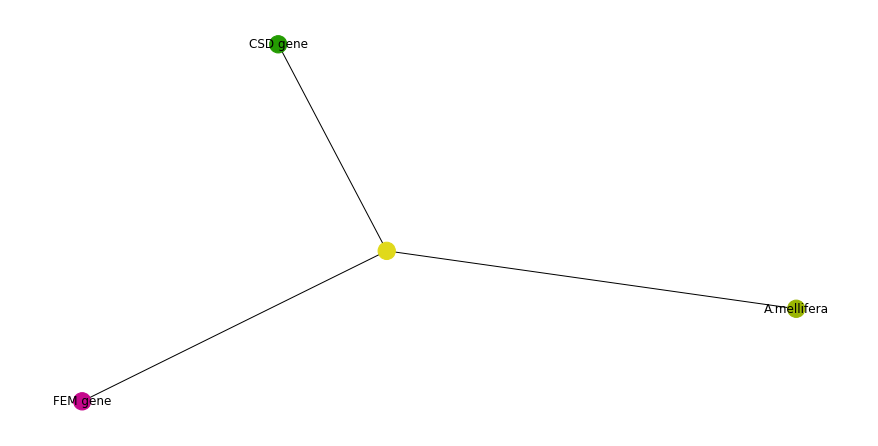

In [21]:
Gfem2 = nx.from_pandas_edgelist(filteredDataFem2, 'query_id', 'subject_acc')
Hfem2 = nx.from_pandas_edgelist(filteredDataFem2, 'Org', 'subject_acc')
Gcsd2 = nx.from_pandas_edgelist(filteredDataCSD2, 'query_id', 'subject_acc')
Hcsd2 = nx.from_pandas_edgelist(filteredDataCSD2, 'Org', 'subject_acc')
Ffem2 = nx.compose(Gfem2,Hfem2)
Fcsd2 = nx.compose(Gcsd2, Hcsd2)

nx.relabel_nodes(Ffem2, {0:"FEM"}, copy=False)
nx.relabel_nodes(Fcsd2, {0:"CSD"}, copy=False)

FF = nx.compose(Ffem2, Fcsd2)

label_dict = {}
label_dict['CSD'] = 'CSD gene'
label_dict['FEM'] = 'FEM gene'
label_dict['Amel_HAv3.1'] = 'A.mellifera'

colour_map = {'CSD':'#249c02', # darker green
             'FEM':'#c5078c', # darker pink
             'Amel_HAv3.1':'#9ab503'}

node_colours = [colour_map.get(node, '#E0D91B') for node in FF.nodes()]

plt.figure(1, figsize=(12,6))

nx.draw(FF, labels = label_dict, node_color = node_colours)

plt.show()

At this point no further configuration needs to occur, both the FEM and CSD genes are highly divergent to the point where they can only be found in specific algorithmic searches. In fact, the FEM for B.terrestrics is 1.5x longer than that from A.mellifera, which complicates any comparative genomics (their comparison can be seen here: https://metazoa.ensembl.org/Apis_mellifera/Location/Compara_Alignments/Image?g=GeneID_724970;otherspecies=Bombus_terrestris;r=CM009933.2:11765136-11796509;t=NM_001134828;align=9732;db=core). The two used in this example are derived from A.mellifera which explains why they were found.

The above graph also shows that both genes were identified on the same scaffold, which would be the case as they are downstream from each other on chromosome 2 of A.mellifera.

# References

Coulson, RL., Yasui, DH., Dunaway, KW., Leufer, BI., Ciernia, AV., Zhu, Y., Mordaunt, CE., Totah, TS., LaSalle, JM. 2018. Snord116-dependent diurnal rhythm of DNA methylation in mouse cortex. _Nature Communications_ [e-journal]. 9(1). pp. 1616. DOI: 10.1038/s41467-018-03676-0.

Bertozzi, AL., Franco, E., Mohler, G., Short, MB., Sledge, D. 2020. The challenges of modeling and forecasting the spread of COVID-19. _Proc Natl Acad Sci U S A_ [e-journal]. 117(29). pp.16732-16738. doi: 10.1073/pnas.2006520117.

Leloup, JC., Gonze, D., Goldbeter, A. 1999. Limit cycle models for circadian rhythms based on transcriptional regulation in Drosophila and Neurospora. _Journal of Biological Rhythms_ [e-journal]. 14(6). pp.433-448. doi: 10.1177/074873099129000948.